In [14]:
####### os, pickle
import os
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay

from funciones import* 
from collections import Counter
from imblearn.over_sampling import SMOTE 

In [2]:
from main import *

X: (60151, 10055) y: (60151,)
X: (60151, 155) y: (60151,)


In [7]:
#X_balanceado.head()
X_balanceado_redux.head()

,Rubro1_Artículos de electrónica,Rubro1_Artículos de fabricación y producción,Rubro1_Artículos eléctricos y de iluminación,"Rubro1_Artículos para estructuras, obras y construcciones",Rubro1_Artículos para plantas y animales,"Rubro1_Combustibles, lubricantes y anticorrosivos",Rubro1_Consultoria,"Rubro1_Educación, formación, entrenamiento y capacitación","Rubro1_Equipamiento para el acondicionamiento, distribución y filtrado de fluidos",Rubro1_Equipamiento para laboratorios,...,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99
0,0,0,0,0,0,0,0,0,0,0,...,0.010370,0.001922,0.002384,-0.003176,-0.016768,0.016105,0.014518,-0.004374,0.014733,0.016021
1,0,0,0,0,0,0,0,0,0,0,...,-0.006616,0.025013,-0.009989,0.022475,0.035416,0.016455,-0.005875,-0.005911,-0.040565,-0.008323
2,0,0,0,0,0,0,0,0,0,0,...,0.007241,-0.000304,0.000046,-0.019726,0.007466,0.001937,0.009018,0.011874,-0.003874,-0.001331
3,0,0,0,0,0,0,0,0,0,0,...,-0.006779,-0.072715,-0.107945,0.052264,-0.008607,-0.029650,-0.129701,-0.059450,-0.116689,-0.006600
4,0,0,0,0,0,0,0,0,0,0,...,0.000273,-0.004233,0.001551,-0.006063,-0.001259,0.002551,-0.000403,0.003726,0.001344,-0.000466


In [9]:
Counter(y_balanceado)
#Counter(y_balanceado_redux)

Counter({0: 46270, 1: 13881})

In [5]:
X_balanceado
y_balanceado

X_balanceado_redux
y_balanceado_redux

'''X = df3.drop(columns=['id_producto','label'], axis=1) # creamos la variables independientes
y = df3['label']  # creamos la variable dependiente

oversampling = SMOTE(sampling_strategy=0.30) # usamos oversampling sintético podemos elegir el nivel de oversampling con  sampling_strategy=0.80
X_balanceado, y_balanceado = oversampling.fit_resample(X, y) #Se obtienen nuevos X e y

'''
X_train, X_test, y_train, y_test = train_test_split(
    X_balanceado_redux, y_balanceado_redux, test_size=0.33, random_state=42)


Counter({0: 46270, 1: 13881})

In [10]:
clf = LogisticRegression(
    solver='lbfgs', 
    penalty='l2',
    multi_class='ovr',
    max_iter=500,
    n_jobs=-1,
    verbose=1) # la forma del GD
clf = clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)
probs = clf.predict_proba(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   20.2s finished


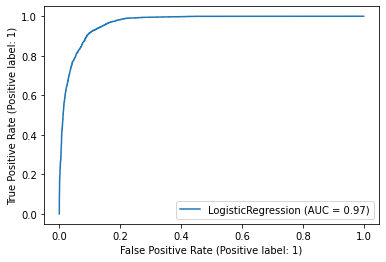

Train AUC 0.9655902392985262
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     31072
           1       0.87      0.67      0.76      9229

    accuracy                           0.90     40301
   macro avg       0.89      0.82      0.85     40301
weighted avg       0.90      0.90      0.90     40301



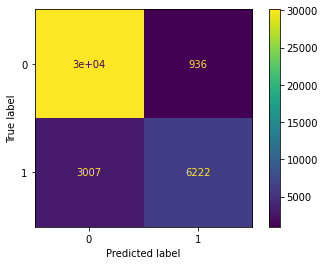

Test AUC 0.9667083944497833
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     15198
           1       0.88      0.67      0.76      4652

    accuracy                           0.90     19850
   macro avg       0.89      0.82      0.85     19850
weighted avg       0.90      0.90      0.90     19850



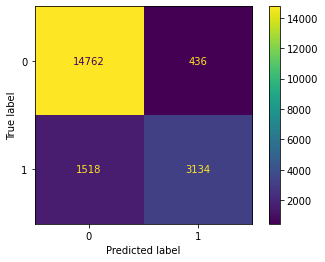

In [12]:
metrics(clf, X_train, X_test, y_train, y_test, thr=0.6)

In [15]:
m_reglog = {'model':clf,'metricas':0}
fh = open('m_reglog','wb')
#fh = open('df_smote30_train_test(redux).pkl','wb')
pickle.dump(m_reglog,fh)
fh.close()

In [16]:
m_reglog

{'model': LogisticRegression(max_iter=500, multi_class='ovr', n_jobs=-1, verbose=1),
 'metricas': 0}